# Milestone 1 Phase 1
- Muhammad Fadlil Ismail
- FTDS Batch 10 Phase 1

## Objective

### Tujuan
1. Mampu memahami konsep supervised learning
2. Mampu mempersiapkan data untuk digunakan dalam model supervised learning
3. Mampu mengimplementasikan supervised learning dengan data yang diberikan
4. Mampu melakukan evaluasi model
5. Mampu melakukan model tuning

### Tentang dataset
#### Input variables:
#### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import OutlierTrimmer
from feature_engine.outliers import Winsorizer
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

In [3]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_copy = df.copy()

### Cek dataset

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Data terdiri dari 21 kolom, dimana 10 kolom menyimpan data numerik dan 11 kolom menyimpan data kategorik.

In [7]:
df.shape

(41188, 21)

Dataset berisi 41188 jumlah baris.

## Exploratory Data Analysis

### Buat daftar kolom numerik dan kategorik

In [8]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

### Cek unique value dan jumlahnya pada kolom kategorik

Berikut daftar kolom kategorik beserta jumlah unique value-nya :

In [9]:
a_lst = []
for i in cat_columns:
    print('Kolom: ', i)
    print('Jumlah unique value: ', df[i].nunique())
    a = df[i].value_counts()
    a_lst.append(a)

Kolom:  job
Jumlah unique value:  12
Kolom:  marital
Jumlah unique value:  4
Kolom:  education
Jumlah unique value:  8
Kolom:  default
Jumlah unique value:  3
Kolom:  housing
Jumlah unique value:  3
Kolom:  loan
Jumlah unique value:  3
Kolom:  contact
Jumlah unique value:  2
Kolom:  month
Jumlah unique value:  10
Kolom:  day_of_week
Jumlah unique value:  5
Kolom:  poutcome
Jumlah unique value:  3
Kolom:  y
Jumlah unique value:  2


Adapun jumlah value untuk tiap-tiap unique value di setiap kolom adalah sebagai berikut :

In [10]:
for i in a_lst:
    print(i)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178

Berikut crosstab untuk tiap-tiap value pada kolom kategorik dengan value pada kolom target (y):

In [11]:
for i in cat_columns:
    xtab = pd.crosstab(df.y, df[i])
    print(xtab)

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     9070         8616          1332        954        2596     1286   
yes    1352          638           124        106         328      434   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1272      3646      600        6013         870      293  
yes            149       323      275         730         144       37  
marital  divorced  married  single  unknown
y                                          
no           4136    22396    9948       68
yes           476     2532    1620       12
education  basic.4y  basic.6y  basic.9y  high.school  illiterate  \
y                                                                  
no             3748      2104      5572         8484          14   
yes             428       188  

### Cek distribusi data kolom numerik

Berikut adalah plot data pada kolom numerik untuk tiap-tiap value pada kolom target :

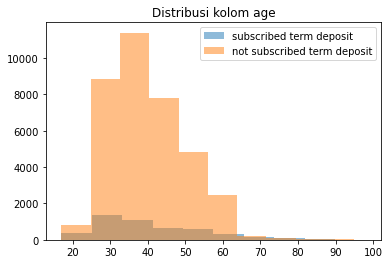

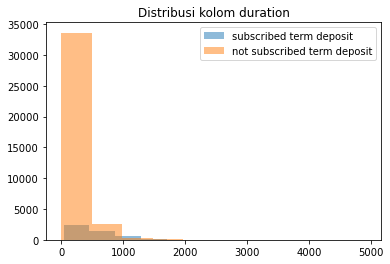

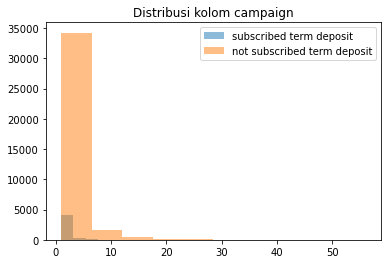

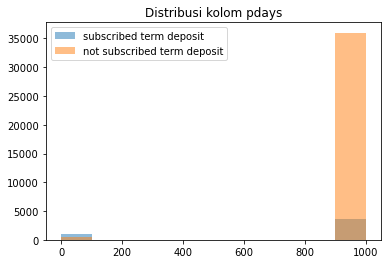

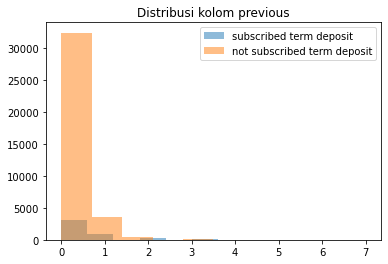

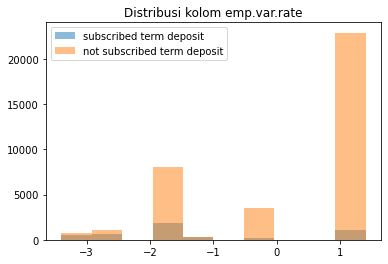

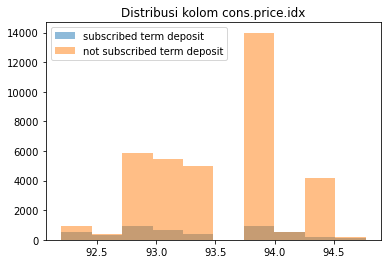

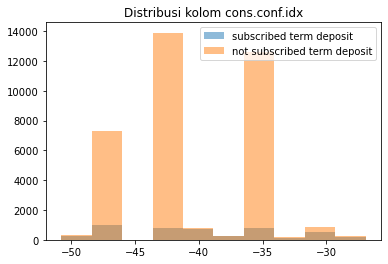

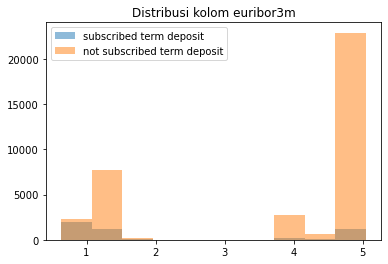

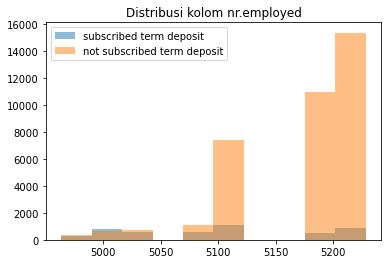

In [12]:
for i in num_columns:
    a = df[df.y=='yes'][i]
    b = df[df.y=='no'][i]
    plt.hist(a, alpha=0.5, label='subscribed term deposit')
    plt.hist(b, alpha=0.5, label='not subscribed term deposit')
    plt.title('Distribusi kolom '+ i)
    plt.legend()
    plt.show()

### Rata-rata tiap kolom numerik

Berikut rata-rata value kolom numerik untuk tiap-tiap kelas target (y):

In [13]:
df.groupby('y')[num_columns].mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


### Data cleaning

Dari EDA diketahui bahwa missing value pada kolom job, marital, education, default, housing, loan disimpan dengan value 'unknown', sehingga tiap-tiap unknown pada kolom tersebut harus diganti dengan np.nan untuk memudahkan tahapan data preprocessing. Prosesnya adalah sebagai berikut:

In [14]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    df[i].replace('unknown', np.nan, inplace=True)

Dari penjelasan mengenai dataset, diketahui bahwa nilai 999 pada kolom pdays adalah missing value, sehingga nilai tersebut harus diganti dengan np.nan. Prosesnya adalah berikut :

In [15]:
df['pdays'].replace(999, np.nan, inplace=True)

Cek missing value untuk tiap-tiap kolom:

In [16]:
df.isna().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

Missing value telah terdeteksi, sehingga dapat diproses pada tahapan Data Preprocessing.

## Data Preprocessing

### Ambil inference

In [17]:
#Ambil inference
df_inf = df.sample(20, random_state=69)

#Pisahkan inference dari semua data
df_train_test = df.drop(df_inf.index)

#Reset index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

Diambil inference secara random sebanyak 20 buah.

### Split feature (X) dan target (y)

In [18]:
X = df_train_test.drop('y', axis=1)
y = df_train_test['y']

kolom target adalah kolom y, sedangkan feature adalah kolom selain kolom tersebut.

### Split data train dan data test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

In [20]:
#Reset index
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

#Cek dimensi
print(f'dimensi x-train: {X_train.shape}')
print(f'dimensi x-test : {X_test.shape}')
print(f'dimensi y-train: {y_train.shape}')
print(f'dimensi y-test : {y_test.shape}')

dimensi x-train: (32934, 20)
dimensi x-test : (8234, 20)
dimensi y-train: (32934,)
dimensi y-test : (8234,)


Dimensi untuk X, y, baik train maupun test sudah sesuai. Digunakan rasio data test 20% dari semua data.

### Cek dan handling outlier

Cek skewness untuk tiap-tiap kolom numerik:

In [21]:
#Cek Skewness
skew = []
for i in num_columns:
    skew.append(abs(X_train[i].skew()))

In [22]:
df_skew = pd.DataFrame({'Kolom':num_columns, 'Skewness_abs':skew})
df_skew['normal'] = df_skew.Skewness_abs.apply(lambda x: True if x<=0.5 else False)
df_skew

,Kolom,Skewness_abs,normal
0,age,0.792131,False
1,duration,3.357402,False
2,campaign,4.812637,False
3,pdays,1.461416,False
4,previous,3.891309,False
5,emp.var.rate,0.721983,False
6,cons.price.idx,0.230144,True
7,cons.conf.idx,0.304545,True
8,euribor3m,0.706553,False
9,nr.employed,1.044171,False


Buat list berisi kolom terdistribusi normal dan kolom tidak terdistribusi normal.

In [23]:
skew_col = list(df_skew[df_skew.normal==False]['Kolom'])
normal_col = list(df_skew[df_skew.normal==True]['Kolom'])

Lakukan pengecekan jumlah outlier pada kolom yang tidak terdistribusi normal.

In [24]:
jumlah_outliers = []
percent_outliers = []
lower1_lst = []
upper1_lst = []
for i in skew_col:
    num = 3
    q1 = np.nanquantile(X_train[i], 0.25)
    q3 = np.nanquantile(X_train[i], 0.75)
    iqr = q3 - q1
    upper1 = q3 + num*iqr
    lower1 = q1 - num*iqr
    upper1_lst.append(upper1)
    lower1_lst.append(lower1)
    jumlah = len(X_train[(X_train[i]>upper1)|(X_train[i]<lower1)])
    jumlah_outliers.append(jumlah)
    percent = len(X_train[(X_train[i]>upper1)|(X_train[i]<lower1)])*100/len(X_train)
    percent_outliers.append(percent)

Berikut daftar kolom skew beserta jumlah outlier nya:

In [25]:
pd.DataFrame({'kolom':skew_col, 'jumlah_outlier':jumlah_outliers, 'persen_outlier':percent_outliers, 'upper': upper1_lst, 'lower': lower1_lst})

,kolom,jumlah_outlier,persen_outlier,upper,lower
0,age,2,0.006073,92.000,-13.000
1,duration,847,2.571810,967.000,-545.000
2,campaign,876,2.659865,9.000,-5.000
3,pdays,7,0.021255,19.000,-9.000
4,previous,4481,13.606000,0.000,0.000
5,emp.var.rate,0,0.000000,11.000,-11.400
6,euribor3m,0,0.000000,15.812,-9.507
7,nr.employed,0,0.000000,5615.100,4712.100


Terdapat outlier pada kolom age, duration, campaign, pdays, previous.

Lakukan pengecekan jumlah dan persentase outlier pada kolom yang terdistribusi normal.

In [26]:
percent_outliers1 = []
jumlah_outliers1 = []
upper_lst = []
lower_lst = []
for i in normal_col:
    std = X_train[i].std()
    upper = X_train[i].mean() + 3*std
    lower = X_train[i].mean() - 3*std
    upper_lst.append(upper)
    lower_lst.append(lower)
    jumlah = len(X_train[(X_train[i]>upper)|(X_train[i]<lower)])
    jumlah_outliers1.append(jumlah)
    percent = len(X_train[(X_train[i]>upper)|(X_train[i]<lower)])*100/len(X_train)
    percent_outliers1.append(percent)

Berikut daftar kolom terdistribusi normal beserta jumlah outlier-nya:

In [27]:
pd.DataFrame({'kolom':normal_col, 'jumlah_outlier':jumlah_outliers1, 'persen_outlier':percent_outliers1, 'upper':upper_lst, 'lower':lower_lst})

,kolom,jumlah_outlier,persen_outlier,upper,lower
0,cons.price.idx,0,0.0,95.317823,91.837105
1,cons.conf.idx,0,0.0,-26.608462,-54.386972


Tidak terdapat outlier pada kolom dengan distribusi normal.

Handling Outlier :
1. Oulier pada kolom age dibiarkan karena usia merupakan hal yang sifatnya alami.
2. Pada kolom previous terlihat bahwa upper dan lower limit dari data yang normal adalah 0, artinya mayoritas data pada kolom ini bernilai 0 dan hanya sedikit sekali yang bernilai lebih dari 0, apabila kita menghilangkan outlier pada kolom ini, maka seluruh data pada kolom ini menjadi seragam.

Cek jumlah kolom yang mengandung outlier pada kolom duration, campaign dan pdays :

In [28]:
X_train[(X_train.duration>967)|(X_train.campaign>9)|(X_train.pdays>19)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
51,59,retired,married,university.degree,no,no,no,cellular,apr,tue,1073,1,NaN,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1
53,30,blue-collar,married,basic.9y,no,no,no,telephone,jun,thu,53,29,NaN,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
60,35,blue-collar,married,basic.9y,no,no,no,telephone,jun,mon,388,12,NaN,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
65,58,retired,married,university.degree,NaN,no,no,cellular,aug,thu,17,11,NaN,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1
175,56,blue-collar,married,basic.4y,NaN,yes,yes,telephone,may,fri,1252,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32799,35,technician,married,NaN,NaN,no,no,telephone,may,thu,1224,2,NaN,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
32812,56,retired,married,basic.6y,no,yes,no,telephone,jun,fri,51,19,NaN,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
32823,41,services,single,NaN,NaN,no,no,cellular,jul,tue,717,13,NaN,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
32845,26,student,single,basic.9y,no,yes,no,cellular,mar,mon,1447,2,NaN,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1


Terdapat total 1714 baris data yang mengandung outlier di kolom duration, campaign, pdays. Jumlah tersebut melebihi 5% dari data sehingga diputuskan bahwa outlier pada ketiga kolom tersebut akan di-capping menggunakan Winsorizer.

In [29]:
capper = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['duration', 'campaign', 'pdays'], missing_values='ignore')
capper.fit(X_train)

X_train_capped = capper.transform(X_train)

### Cek dan handling missing value

Berikut jumlah missing value pada tiap tiap kolom dalam persen:

In [30]:
X_train_capped.isna().mean()*100

age                0.000000
job                0.798567
marital            0.200401
education          4.196271
default           20.805247
housing            2.368373
loan               2.368373
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays             96.338131
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
dtype: float64

Berikut jumlah missing value pada tiap tiap kolom:

In [31]:
X_train_capped.isna().sum()

age                   0
job                 263
marital              66
education          1382
default            6852
housing             780
loan                780
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             31728
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
dtype: int64

Handling Missing Value:
1. Pada kolom pdays, kolom di-drop karena lebih dari 60%.
2. Pada kolom job, marital, education, default, housing dan loan, dilakukan inputasi modus karena kolom-kolom ini adalah kolom kategorik.

Drop kolom pdays pada X_train dan X_test

In [32]:
X_train_clean = X_train_capped.drop('pdays', axis=1)
X_test_clean = X_test.drop('pdays', axis=1)

print(X_train_clean.shape)
print(X_test_clean.shape)

(32934, 19)
(8234, 19)


Kolom pdays telah di-drop, setelah di-cek dimensinya telah sesuai.

Lakukan inputasi median pada X_train dan X_test untuk kolom kategorik:

In [33]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    mode = X_train_clean[i].mode()[0]
    X_train_clean[i].fillna(mode, inplace=True)
    X_test_clean[i].fillna(mode, inplace=True)


Cek missing value:

In [34]:
X_train_clean.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [35]:
X_test_clean.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

Missing value sudah tidak ada.

### Feature Selection

Kolom kategorik

Pada kolom kategorik, dilakukan chi square test untuk menentukan apakah kolom tersebut berhubungan dengan kolom target atau tidak. Apabila nilai p-value dari chi square test lebih besar dari 0.05 maka kolom tersebut tidak berhubungan dengan target sehingga dapat di-drop.

In [36]:
cat_columns.remove('y')

Hitung p-value untuk tiap-tiap kolom :

In [37]:
pval1 = []
for i in cat_columns:
    xtab = pd.crosstab(y_train, X_train_clean[i])
    chi2, p, dof, ex = stats.chi2_contingency(xtab)
    pval1.append(p)
a = pd.DataFrame({'Kolom':cat_columns, 'p-value':pval1})
a['drop'] = a['p-value']>0.05
a

,Kolom,p-value,drop
0,job,6.792974e-148,False
1,marital,6.453944e-21,False
2,education,2.027544e-31,False
3,default,1.000000e+00,True
4,housing,5.245050e-02,True
5,loan,1.942064e-01,True
6,contact,2.468166e-152,False
7,month,0.000000e+00,False
8,day_of_week,8.262227e-04,False
9,poutcome,0.000000e+00,False


Didapat kolom default, housing dan loan memiliki p-value > 0.05.

Kolom numerik

Pada kolom numerik, dilakukan two sample two tailed t-test untuk menentukan apakah ada perbedaan rata-rata yang signifikan antara value pada target y='yes' dan target y='no' untuk tiap-tiap kolom numerik. Apabila nilai p-value dari two sample two tailed t-test lebih besar dari 0.05 maka kolom tersebut tidak berhubungan dengan target sehingga dapat di-drop.

Hitung p-value untuk tiap-tiap kolom

In [38]:
num_columns.remove('pdays')

In [39]:
pval2 = []
for i in num_columns:
    a = X_train_clean[y_train=='yes'][i]
    b = X_train_clean[y_train=='no'][i]
    tstat, pval = stats.ttest_ind(a,b)
    pval2.append(pval)
b = pd.DataFrame({'Kolom':num_columns, 'p-value':pval2})
b['drop'] = b['p-value']>0.05
b

,Kolom,p-value,drop
0,age,6.802136e-10,False
1,duration,0.000000e+00,False
2,campaign,2.007780e-41,False
3,previous,0.000000e+00,False
4,emp.var.rate,0.000000e+00,False
5,cons.price.idx,9.318965e-170,False
6,cons.conf.idx,7.536665e-29,False
7,euribor3m,0.000000e+00,False
8,nr.employed,0.000000e+00,False


Untuk kolom numerik, tidak ada kolom dengan pvalue > 0.05

Cek korelasi antar feature : 

<AxesSubplot:>

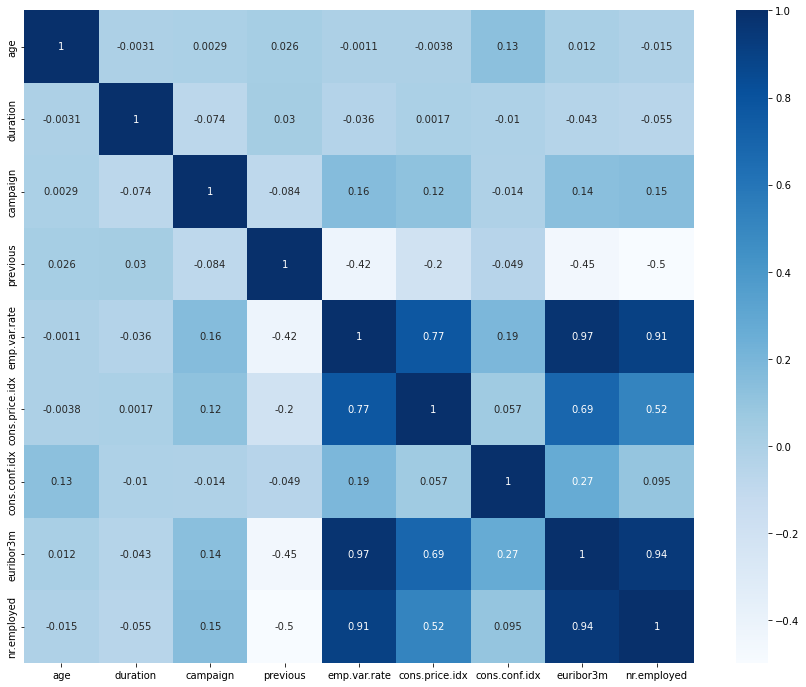

In [40]:
corr1 = X_train_clean.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr1,cmap='Blues',annot=True)

Untuk menyederhanakan model machine learning dan untuk mengurangi resiko training model yang tidak baik, apabila ada hubungan antar feature dengan korelasi > 0.7 atau kurang dari -0.7, maka salah satu kolom akan di drop.

Hubungan korelasi antar kolom dengan nilai korelasi lebih dar 0.7 atau kurang dari -0.7 adalah:
1. Kolom nr.employed dan euribor3m, korelasi 0.94.
2. Kolom nr.employed dan emp.var.rate, korelasi 0.91.
3. Kolom euribor3m dan emp.var.rate, korelasi 0.97.
4. Kolom cons.price.idx dan emp.var.rate, korelasi 0.77.


Dari hasil analisis untuk kolom kategorik dan numerik, diputuskan bahwa kolom yang di-drop adalah:
1. default
2. housing
3. loan

Alasan ketiga kolom di atas di-drop adalah karena nilai p-value dari chi square test terhadap kolom target lebih besar dari 0.05.

4. nr.employed
5. euribor3m
6. cons.price.idx

Ketiga kolom di atas di-drop karena memiliki korelasi dengan feature lain dengan nilai korelasi lebih dari 0.7 atau kurang dari -0.7.

7. duration
Alasan di drop-nya kolom ini ada di penjelasan mengenai dataset pada laman https://archive.ics.uci.edu/ml/datasets/Bank+Marketing bagian Attribute Information, bunyinya:
```
 duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
```
Intinya, model machine learning yang ingin dibuat harapannya dapat memprediksi apakah seorang calon customer akan mengambil produk deposito berjangka (term deposit) atau tidak, dimana prediksi akan dibuat sebelum Sales atau Customer Service dari bank menghubungi calon customer. Kolom duration berisi durasi lamanya komunikasi berlangsung antara calon customer dengan pihak bank, yang mana nilai ini baru diketahui setelah penelponan berakhir, bukan sebelum penelponan dilakukan.

Lakukan drop kolom untuk X_train dan X_test :

In [41]:
X_train_selection = X_train_clean.drop(['default', 'housing', 'loan', 'nr.employed', 'euribor3m', 'cons.price.idx', 'duration'], axis = 1)
X_train_selection

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.conf.idx
0,42,admin.,married,basic.6y,telephone,may,tue,2.0,0,nonexistent,1.1,-36.4
1,50,unemployed,married,professional.course,cellular,nov,fri,1.0,1,failure,-0.1,-42.0
2,35,blue-collar,married,basic.9y,telephone,may,thu,2.0,0,nonexistent,1.1,-36.4
3,33,self-employed,married,basic.6y,telephone,may,fri,5.0,0,nonexistent,1.1,-36.4
4,52,technician,married,university.degree,cellular,aug,wed,7.0,0,nonexistent,1.4,-36.1
...,...,...,...,...,...,...,...,...,...,...,...,...
32929,31,admin.,married,university.degree,cellular,nov,thu,1.0,0,nonexistent,-0.1,-42.0
32930,33,self-employed,married,university.degree,telephone,may,wed,1.0,0,nonexistent,1.1,-36.4
32931,29,services,married,university.degree,cellular,jun,fri,2.0,0,nonexistent,-2.9,-40.8
32932,29,services,single,high.school,cellular,nov,wed,1.0,1,failure,-0.1,-42.0


In [42]:
X_test_selection = X_test_clean.drop(['default', 'housing', 'loan', 'nr.employed', 'euribor3m', 'cons.price.idx', 'duration'], axis = 1)
X_test_selection

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.conf.idx
0,27,admin.,single,high.school,cellular,jun,tue,2,0,nonexistent,-1.7,-39.8
1,47,housemaid,married,basic.4y,cellular,jul,mon,1,0,nonexistent,1.4,-42.7
2,24,student,single,university.degree,cellular,aug,fri,1,2,success,-2.9,-31.4
3,41,blue-collar,married,basic.4y,telephone,may,thu,1,0,nonexistent,1.1,-36.4
4,38,admin.,married,high.school,telephone,may,wed,16,0,nonexistent,1.1,-36.4
...,...,...,...,...,...,...,...,...,...,...,...,...
8229,33,admin.,married,high.school,cellular,aug,mon,1,1,success,-2.9,-31.4
8230,43,blue-collar,married,basic.6y,telephone,jun,mon,1,0,nonexistent,1.4,-41.8
8231,24,technician,married,university.degree,cellular,sep,tue,2,1,success,-3.4,-29.8
8232,34,services,married,high.school,cellular,nov,tue,1,0,nonexistent,-0.1,-42.0


Setelah dilakukan drop feature, dimensi X_train dan X_test telah sesuai.

### Pisahkan colom numerik dan kategorik

Sebelum dilakukan encoding dan sclaing, kolom numerik dan kategorik dipisahkan terlebih dahulu:

In [43]:
num_col_fix = ['age', 'campaign',	'previous', 'emp.var.rate',	'cons.conf.idx']
cat_col_fix = ['job',	'marital',	'education',	'contact',	'month',	'day_of_week', 'poutcome']

In [44]:
X_train_num = X_train_selection[num_col_fix]
X_train_cat = X_train_selection[cat_col_fix]

X_test_num = X_test_selection[num_col_fix]
X_test_cat = X_test_selection[cat_col_fix]


In [45]:
print(X_train_num.shape)
print(X_train_cat.shape)
print(X_test_num.shape)
print(X_test_cat.shape)

(32934, 5)
(32934, 7)
(8234, 5)
(8234, 7)


Dimensi X_train dan X_test untuk numerik dan kategorik telah sesuai.

### Feature Scaling

Akan dilakukan MinMaxScaler untuk kolom yang terdistribusi tidak normal, adapun untuk kolom terdistribusi normal akan dilakukan StandardScaler. Oleh karena itu perlu dipisahkan antara kolom terdistribusi normal dan tidak normal.

In [46]:
normal_fix = ['cons.conf.idx']
skew_fix = ['age', 'campaign',	'previous', 'emp.var.rate']

Lakukan MinMaxScaler untuk data yang terdistribusi skew dan simpan ke Dataframe:

In [47]:
X_train_skew = X_train_num[skew_fix]
X_test_skew = X_test_num[skew_fix]

scaler1 = MinMaxScaler()
scaler1.fit(X_train_skew)

X_train_scaled1 = scaler1.transform(X_train_skew)
X_train_scaled1 = pd.DataFrame(X_train_scaled1)
X_train_scaled1.columns = skew_fix

X_test_scaled1  = scaler1.transform(X_test_skew)
X_test_scaled1 = pd.DataFrame(X_test_scaled1)
X_test_scaled1.columns = skew_fix

Seharusnya dilakukan StandardScaler untuk data yang terdistribusi normal, akan tetapi model Naive Bayes tidak dapat menerima input value negatif, sehingga digunakan model MinMaxScaler:

In [48]:
X_train_normal = X_train_num[normal_fix]
X_test_normal= X_test_num[normal_fix]

scaler2 = MinMaxScaler()

scaler2.fit(X_train_normal)

X_train_scaled2 = scaler2.transform(X_train_normal)
X_train_scaled2 = pd.DataFrame(X_train_scaled2)
X_train_scaled2.columns = normal_fix

X_test_scaled2  = scaler2.transform(X_test_normal)
X_test_scaled2 = pd.DataFrame(X_test_scaled2)
X_test_scaled2.columns = normal_fix

Gabungkan X_train:

In [49]:
X_train_scaled = X_train_scaled1.join(X_train_scaled2)
X_train_scaled

,age,campaign,previous,emp.var.rate,cons.conf.idx
0,0.308642,0.125,0.000000,0.937500,0.602510
1,0.407407,0.000,0.142857,0.687500,0.368201
2,0.222222,0.125,0.000000,0.937500,0.602510
3,0.197531,0.500,0.000000,0.937500,0.602510
4,0.432099,0.750,0.000000,1.000000,0.615063
...,...,...,...,...,...
32929,0.172840,0.000,0.000000,0.687500,0.368201
32930,0.197531,0.000,0.000000,0.937500,0.602510
32931,0.148148,0.125,0.000000,0.104167,0.418410
32932,0.148148,0.000,0.142857,0.687500,0.368201


Gabungkan X_test:

In [50]:
X_test_scaled = X_test_scaled1.join(X_test_scaled2)
X_test_scaled

,age,campaign,previous,emp.var.rate,cons.conf.idx
0,0.123457,0.125,0.000000,0.354167,0.460251
1,0.370370,0.000,0.000000,1.000000,0.338912
2,0.086420,0.000,0.285714,0.104167,0.811715
3,0.296296,0.000,0.000000,0.937500,0.602510
4,0.259259,1.875,0.000000,0.937500,0.602510
...,...,...,...,...,...
8229,0.197531,0.000,0.142857,0.104167,0.811715
8230,0.320988,0.000,0.000000,1.000000,0.376569
8231,0.086420,0.125,0.142857,0.000000,0.878661
8232,0.209877,0.000,0.000000,0.687500,0.368201


Dimensi untuk X_train dan X_test telah sesuai.

### Feature Encoding

Lakukan encoding untuk kolom dengan data kategorik ordinal, yaitu kolom education, month, day_of_week. Simpan hasilnya ke dalam bentuk dataframe.

In [51]:
X_train_cat['education'].value_counts()

university.degree      11068
high.school             7629
basic.9y                4844
professional.course     4227
basic.4y                3308
basic.6y                1844
illiterate                14
Name: education, dtype: int64

In [52]:
#Encoding Education
X_train_ed = X_train_cat['education'].map({'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'professional.course':5, 'university.degree':6})
X_test_ed = X_test_cat['education'].map({'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'professional.course':5, 'university.degree':6})

X_train_ed = pd.DataFrame(X_train_ed, columns=['education'])
X_test_ed = pd.DataFrame(X_test_ed, columns=['education'])

print(X_train_ed.shape)
print(X_test_ed.shape)

(32934, 1)
(8234, 1)


In [53]:
#Encoding day_of_week
X_train_day = X_train_cat['day_of_week'].map({'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4})
X_test_day = X_test_cat['day_of_week'].map({'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4})

X_train_day = pd.DataFrame(X_train_day, columns=['day_of_week'])
X_test_day = pd.DataFrame(X_test_day, columns=['day_of_week'])

print(X_train_day.shape)
print(X_test_day.shape)

(32934, 1)
(8234, 1)


In [54]:
#Encoding month
X_train_month = X_train_cat['month'].map({'jan':0, 'feb':1, 'mar':2, 'apr':3, 'may':4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11})
X_test_month = X_test_cat['month'].map({'jan':0, 'feb':1, 'mar':2, 'apr':3, 'may':4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11})

X_train_month = pd.DataFrame(X_train_month, columns=['month'])
X_test_month = pd.DataFrame(X_test_month, columns=['month'])

print(X_train_month.shape)
print(X_test_month.shape)

(32934, 1)
(8234, 1)


Lakukan OneHotEncoding untuk kolom 'job',	'marital',	'contact',	'poutcome'. Simpan hasilnya ke dalam bentuk dataframe.

In [55]:
ohe_col = ['job',	'marital',	'contact',	'poutcome']

X_train_ohe = X_train_cat[ohe_col]
X_test_ohe = X_test_cat[ohe_col]

encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train_ohe)
X_train_ohe = encoder.transform(X_train_ohe)
X_test_ohe = encoder.transform(X_test_ohe)

In [56]:
X_train_ohe = pd.DataFrame(X_train_ohe)
X_test_ohe = pd.DataFrame(X_test_ohe)
X_train_ohe.columns = encoder.get_feature_names()
X_test_ohe.columns = encoder.get_feature_names()

Gabungkan X_train hasil encoding:

In [57]:
X_train_encoded = X_train_ohe.join(X_train_ed).join(X_train_day).join(X_train_month)
X_train_encoded

,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,x0_unemployed,x1_divorced,x1_married,x1_single,x2_cellular,x2_telephone,x3_failure,x3_nonexistent,x3_success,education,day_of_week,month
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,1,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,5,4,10
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3,3,4
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,4,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32929,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6,3,10
32930,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,6,2,4
32931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6,4,5
32932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4,2,10


Gabungkan X_test hasil encoding:

In [58]:
X_test_encoded = X_test_ohe.join(X_test_ed).join(X_test_day).join(X_test_month)
X_test_encoded

,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,x0_unemployed,x1_divorced,x1_married,x1_single,x2_cellular,x2_telephone,x3_failure,x3_nonexistent,x3_success,education,day_of_week,month
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4,1,5
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,6
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6,4,7
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,3,4
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8229,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4,0,7
8230,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,0,5
8231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6,1,8
8232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4,1,10


Dimensi untuk X_train dan X_test telah sesuai.

Lakukan encoding untuk y_train dan y_test :

In [59]:
y_train_final = y_train.map({'yes':1, 'no':0})
y_train_final

0        0
1        0
2        0
3        0
4        0
        ..
32929    0
32930    0
32931    0
32932    0
32933    0
Name: y, Length: 32934, dtype: int64

In [60]:
y_test_final = y_test.map({'yes':1, 'no':0})
y_test_final


0       1
1       0
2       1
3       0
4       0
       ..
8229    1
8230    0
8231    1
8232    0
8233    0
Name: y, Length: 8234, dtype: int64

Dimensi y_train dan y_test telah sesuai.

### Gabungkan X_train, X_test hasil scaling dan encoding

Gabungkan X_train:

In [61]:
X_train_final = X_train_scaled.join(X_train_encoded)
X_train_final

,age,campaign,previous,emp.var.rate,cons.conf.idx,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,x0_unemployed,x1_divorced,x1_married,x1_single,x2_cellular,x2_telephone,x3_failure,x3_nonexistent,x3_success,education,day_of_week,month
0,0.308642,0.125,0.000000,0.937500,0.602510,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,1,4
1,0.407407,0.000,0.142857,0.687500,0.368201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,5,4,10
2,0.222222,0.125,0.000000,0.937500,0.602510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3,3,4
3,0.197531,0.500,0.000000,0.937500,0.602510,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,4,4
4,0.432099,0.750,0.000000,1.000000,0.615063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32929,0.172840,0.000,0.000000,0.687500,0.368201,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6,3,10
32930,0.197531,0.000,0.000000,0.937500,0.602510,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,6,2,4
32931,0.148148,0.125,0.000000,0.104167,0.418410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6,4,5
32932,0.148148,0.000,0.142857,0.687500,0.368201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4,2,10


Gabungkan X_test:

In [62]:
X_test_final = X_test_scaled.join(X_test_encoded)
X_test_final

,age,campaign,previous,emp.var.rate,cons.conf.idx,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,x0_unemployed,x1_divorced,x1_married,x1_single,x2_cellular,x2_telephone,x3_failure,x3_nonexistent,x3_success,education,day_of_week,month
0,0.123457,0.125,0.000000,0.354167,0.460251,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4,1,5
1,0.370370,0.000,0.000000,1.000000,0.338912,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,6
2,0.086420,0.000,0.285714,0.104167,0.811715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6,4,7
3,0.296296,0.000,0.000000,0.937500,0.602510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,3,4
4,0.259259,1.875,0.000000,0.937500,0.602510,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8229,0.197531,0.000,0.142857,0.104167,0.811715,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4,0,7
8230,0.320988,0.000,0.000000,1.000000,0.376569,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,0,5
8231,0.086420,0.125,0.142857,0.000000,0.878661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6,1,8
8232,0.209877,0.000,0.000000,0.687500,0.368201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4,1,10


Dimensi X_train dan X_test telah sesuai.

## Model Definition

### Logistic Regression

In [63]:
model_lr = LogisticRegression()

### Support Vector Machine

Pada model SVM, probability di-set = True agar dapat dilakukan predict proba untuk menghitung nilai roc_auc_score.

In [64]:
model_svm = SVC(probability=True)

### Decision Tree Classifier

In [65]:
model_dt = DecisionTreeClassifier()

### Random Forest Classifier

In [66]:
model_rf = RandomForestClassifier()

### K Nearest Neighbors Classifier

In [67]:
model_knn = KNeighborsClassifier()

### Gaussian Naive Bayes

Diantara tiga jenis Naive Bayes, dipilih Gaussian Naive Bayes, karena model ini paling cocok untuk feature dengan nilai continous. Feature dengan nilai continous terdapat pada kolom numerik setelah dilakukan scaling.

In [68]:
model_gnb = GaussianNB()

### Gradient Boosting Classifier

In [69]:
model_gb = GradientBoostingClassifier()

## Model Training

Pada tahapan ini, akan dilakukan training tiap-tiap model menggunakan X_train_final dan y_train_final. Lalu, dilakukan Cross Validation dengan scoring ROC AUC score untuk menentukan model mana yang paling baik dalam melakukan prediksi terhadap dataset ini. Digunakan ROC AUC score dikarenakan perbandingan jumlah target yang tidak seimbang antara target = 'yes' dan target = 'no'.

### Logsitic Regression
Berikut training model untuk model ini beserta hasil Cross Validation-nya:

In [70]:
model_lr.fit(X_train_final, y_train_final)

LogisticRegression()

In [71]:
train_cross_val_lr = cross_val_score(model_lr, 
                                      X_train_final, 
                                      y_train_final, 
                                      cv=5, scoring="roc_auc")

print('ROC_AUC - All - Cross Validation  : ', train_cross_val_lr)
print('ROC_AUC - Mean - Cross Validation : ', train_cross_val_lr.mean())
print('ROC_AUC - Std - Cross Validation  : ', train_cross_val_lr.std())
print('ROC_AUC - Range of Test-Set       : ', (train_cross_val_lr.mean()-train_cross_val_lr.std()) , '-', (train_cross_val_lr.mean()+train_cross_val_lr.std()))

ROC_AUC - All - Cross Validation  :  [0.76917655 0.76420259 0.75716809 0.77573886 0.78284568]
ROC_AUC - Mean - Cross Validation :  0.769826353311321
ROC_AUC - Std - Cross Validation  :  0.008907762065217562
ROC_AUC - Range of Test-Set       :  0.7609185912461034 - 0.7787341153765386


Didapat nilai auc score rata-rata sebesar 0.7698, dengan rentang auc score untuk data test sekitar 0.7609 - 0.7787.

### Support Vector Machine
Berikut training model untuk model ini beserta hasil Cross Validation-nya:

In [72]:
model_svm.fit(X_train_final, y_train_final)

SVC(probability=True)

In [73]:
train_cross_val_svm = cross_val_score(model_svm, 
                                      X_train_final, 
                                      y_train_final, 
                                      cv=5, scoring="roc_auc")

print('ROC_AUC - All - Cross Validation  : ', train_cross_val_svm)
print('ROC_AUC - Mean - Cross Validation : ', train_cross_val_svm.mean())
print('ROC_AUC - Std - Cross Validation  : ', train_cross_val_svm.std())
print('ROC_AUC - Range of Test-Set       : ', (train_cross_val_svm.mean()-train_cross_val_svm.std()) , '-', (train_cross_val_svm.mean()+train_cross_val_svm.std()))

ROC_AUC - All - Cross Validation  :  [0.67351735 0.68698337 0.69475854 0.71601212 0.71461273]
ROC_AUC - Mean - Cross Validation :  0.6971768203630045
ROC_AUC - Std - Cross Validation  :  0.016299107367503875
ROC_AUC - Range of Test-Set       :  0.6808777129955007 - 0.7134759277305084


Didapat nilai auc score rata-rata sebesar 0.6972, dengan rentang auc score untuk data test sekitar 0.6809 - 0.7135.

### Decision Tree Classifier
Berikut training model untuk model ini beserta hasil Cross Validation-nya:

In [74]:
model_dt.fit(X_train_final, y_train_final)

DecisionTreeClassifier()

In [75]:
train_cross_val_dt = cross_val_score(model_dt, 
                                      X_train_final, 
                                      y_train_final, 
                                      cv=5, scoring="roc_auc")

print('ROC_AUC - All - Cross Validation  : ', train_cross_val_dt)
print('ROC_AUC - Mean - Cross Validation : ', train_cross_val_dt.mean())
print('ROC_AUC - Std - Cross Validation  : ', train_cross_val_dt.std())
print('ROC_AUC - Range of Test-Set       : ', (train_cross_val_dt.mean()-train_cross_val_dt.std()) , '-', (train_cross_val_dt.mean()+train_cross_val_dt.std()))

ROC_AUC - All - Cross Validation  :  [0.64023194 0.611122   0.61237855 0.60817942 0.63011721]
ROC_AUC - Mean - Cross Validation :  0.6204058234030917
ROC_AUC - Std - Cross Validation  :  0.012549878050722708
ROC_AUC - Range of Test-Set       :  0.607855945352369 - 0.6329557014538144


Didapat nilai auc score rata-rata sebesar 0.6204, dengan rentang auc score untuk data test sekitar 0.6079 - 0.6330.

### Random Forest Classifier
Berikut training model untuk model ini beserta hasil Cross Validation-nya:

In [76]:
model_rf.fit(X_train_final, y_train_final)

RandomForestClassifier()

In [77]:
train_cross_val_rf = cross_val_score(model_rf, 
                                      X_train_final, 
                                      y_train_final, 
                                      cv=5, scoring="roc_auc")

print('ROC_AUC - All - Cross Validation  : ', train_cross_val_rf)
print('ROC_AUC - Mean - Cross Validation : ', train_cross_val_rf.mean())
print('ROC_AUC - Std - Cross Validation  : ', train_cross_val_rf.std())
print('ROC_AUC - Range of Test-Set       : ', (train_cross_val_rf.mean()-train_cross_val_rf.std()) , '-', (train_cross_val_rf.mean()+train_cross_val_rf.std()))

ROC_AUC - All - Cross Validation  :  [0.75704613 0.74267188 0.74737085 0.75162744 0.76803587]
ROC_AUC - Mean - Cross Validation :  0.7533504339792861
ROC_AUC - Std - Cross Validation  :  0.008741577297463035
ROC_AUC - Range of Test-Set       :  0.7446088566818231 - 0.7620920112767492


Didapat nilai auc score rata-rata sebesar 0.7534, dengan rentang auc score untuk data test sekitar 0.7446 - 0.7620.

### K Nearest Neighbors Classifier
Berikut training model untuk model ini beserta hasil Cross Validation-nya:

In [78]:
model_knn.fit(X_train_final, y_train_final)

KNeighborsClassifier()

In [79]:
train_cross_val_knn = cross_val_score(model_knn, 
                                      X_train_final, 
                                      y_train_final, 
                                      cv=5, scoring="roc_auc")

print('ROC_AUC - All - Cross Validation  : ', train_cross_val_knn)
print('ROC_AUC - Mean - Cross Validation : ', train_cross_val_knn.mean())
print('ROC_AUC - Std - Cross Validation  : ', train_cross_val_knn.std())
print('ROC_AUC - Range of Test-Set       : ', (train_cross_val_knn.mean()-train_cross_val_knn.std()) , '-', (train_cross_val_knn.mean()+train_cross_val_knn.std()))

ROC_AUC - All - Cross Validation  :  [0.68562713 0.66742752 0.68460272 0.68480297 0.70452682]
ROC_AUC - Mean - Cross Validation :  0.6853974323693353
ROC_AUC - Std - Cross Validation  :  0.011746392137401444
ROC_AUC - Range of Test-Set       :  0.6736510402319338 - 0.6971438245067367


Didapat nilai auc score rata-rata sebesar 0.6854, dengan rentang auc score untuk data test sekitar 0.6736 - 0.6971.

### Gaussian Naive Bayes
Berikut training model untuk model ini beserta hasil Cross Validation-nya:

In [80]:
model_gnb.fit(X_train_final, y_train_final)

GaussianNB()

In [81]:
train_cross_val_gnb = cross_val_score(model_gnb, 
                                      X_train_final, 
                                      y_train_final, 
                                      cv=5, scoring="roc_auc")

print('ROC_AUC - All - Cross Validation  : ', train_cross_val_gnb)
print('ROC_AUC - Mean - Cross Validation : ', train_cross_val_gnb.mean())
print('ROC_AUC - Std - Cross Validation  : ', train_cross_val_gnb.std())
print('ROC_AUC - Range of Test-Set       : ', (train_cross_val_gnb.mean()-train_cross_val_gnb.std()) , '-', (train_cross_val_gnb.mean()+train_cross_val_gnb.std()))

ROC_AUC - All - Cross Validation  :  [0.72686794 0.72997471 0.73582745 0.737442   0.753493  ]
ROC_AUC - Mean - Cross Validation :  0.7367210194656233
ROC_AUC - Std - Cross Validation  :  0.00922185830336972
ROC_AUC - Range of Test-Set       :  0.7274991611622535 - 0.745942877768993


Didapat nilai auc score rata-rata sebesar 0.7367, dengan rentang auc score untuk data test sekitar 0.7275 - 0.7459.

### Gradient Boosting Classifier
Berikut training model untuk model ini beserta hasil Cross Validation-nya:

In [82]:
model_gb.fit(X_train_final, y_train_final)

GradientBoostingClassifier()

In [83]:
train_cross_val_gb = cross_val_score(model_gb, 
                                      X_train_final, 
                                      y_train_final, 
                                      cv=5, scoring="roc_auc")

print('ROC_AUC - All - Cross Validation  : ', train_cross_val_gb)
print('ROC_AUC - Mean - Cross Validation : ', train_cross_val_gb.mean())
print('ROC_AUC - Std - Cross Validation  : ', train_cross_val_gb.std())
print('ROC_AUC - Range of Test-Set       : ', (train_cross_val_gb.mean()-train_cross_val_gb.std()) , '-', (train_cross_val_gb.mean()+train_cross_val_gb.std()))

ROC_AUC - All - Cross Validation  :  [0.79128831 0.78795662 0.78457239 0.80286818 0.80311043]
ROC_AUC - Mean - Cross Validation :  0.7939591876463172
ROC_AUC - Std - Cross Validation  :  0.007673222183958774
ROC_AUC - Range of Test-Set       :  0.7862859654623584 - 0.8016324098302761


Didapat nilai auc score rata-rata sebesar 0.7940, dengan rentang auc score untuk data test sekitar 0.7863 - 0.8016.

Diantara tujuh model machine learning di atas, dalam keadaan default, model Gradient Boosting Classifier menghasilkan auc score rata-rata paling tinggi dibandingkan model lainnya, yaitu sebesar 0.7940. Oleh karena itu akan dilakukan hyperparameter tuning untuk meningkatkan performa model ini dengan bantuan Grid Search CV.

### Hyperparameter Tuning Gradient Boosting Classifier

Akan dilakukan Hyperparameter Tuning untuk model Gradient Boosting Classifier. Hyperparameter yang dipilih adalah max_depth, min_samples_leaf, min_samples_split untuk meminimalisasi overfitting pada data train, dan juga n_estimators untuk mengetahui jumlah estimator yang menghasilkan performa terbaik. Salah satu value diantara beberapa value yang akan dimasukkan ke Grid Search CV adalah nilai default, karena bisa jadi nilai default-lah yang menghasilkan performa terbaik.

Tentukan hyperparameter yang dipilih :

In [84]:
param_grid = {'n_estimators': [100, 150, 200], 'min_samples_leaf': [1, 5, 10], 'min_samples_split': [2, 10, 20], 'max_depth': [3, 4, 5]}

Train GridSearchCV :

In [85]:
model_gridcv = GridSearchCV(estimator=GradientBoostingClassifier(),
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

model_gridcv.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

Tampilkan model terbaik :

In [86]:
model_gridcv.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

Didapat model terbaik hasil tuning dengan hyperparameter sebagai berikut : 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10,'n_estimators': 100.

Definisikan model terbaik :

In [87]:
gb_tuning = model_gridcv.best_estimator_

Cek dengan Cross Validation:

In [88]:
train_cross_val_gb2 = cross_val_score(gb_tuning, 
                                      X_train_final, 
                                      y_train_final, 
                                      cv=5, scoring="roc_auc")

print('ROC_AUC - All - Cross Validation  : ', train_cross_val_gb2)
print('ROC_AUC - Mean - Cross Validation : ', train_cross_val_gb2.mean())
print('ROC_AUC - Std - Cross Validation  : ', train_cross_val_gb2.std())
print('ROC_AUC - Range of Test-Set       : ', (train_cross_val_gb2.mean()-train_cross_val_gb2.std()) , '-', (train_cross_val_gb2.mean()+train_cross_val_gb2.std()))

ROC_AUC - All - Cross Validation  :  [0.79173839 0.78799721 0.78484806 0.80254334 0.80318988]
ROC_AUC - Mean - Cross Validation :  0.7940633755653076
ROC_AUC - Std - Cross Validation  :  0.007514368829538548
ROC_AUC - Range of Test-Set       :  0.786549006735769 - 0.8015777443948462


Didapat rata-rata roc_auc_score 0.7941 dan rentang roc_auc_score untuk data test 0.7865 - 0.8016.

## Model Evaluation

Model machine learning yang dibuat akan digunakan oleh Sales / Customer Service dari Bank untuk memprediksi apakah calon customer akan  mengambil produk simpanan berjangka (term deposit) atau tidak. Apabila model memprediksi bahwa customer tersebut akan mengambil produk simpanan berjangka, maka Sales / Customer Service Bank akan menghubungi calon customer tersebut. Karena model machine learning tidak 100% akurat, pastinya akan ada penolakan dari sebagian customer yang dihubungi, sehingga model machine learning diharapkan mampu meminimalisasi jumlah penolakan dari seluruh calon customer yang dihubungi. Maka dari itu, model yang terbaik adalah model yang memiliki nilai precission paling tinggi.

### Logsitic Regression

Berikut roc auc score dan precission model ini terhadap data test :

In [89]:
y_pred_test_lr = model_lr.predict(X_test_final)
y_proba_test_lr = model_lr.predict_proba(X_test_final)

In [90]:
print(roc_auc_score(y_test_final, y_proba_test_lr[:,1]))

0.777671443287048


In [91]:
print(classification_report(y_test_final, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7306
           1       0.71      0.20      0.31       928

    accuracy                           0.90      8234
   macro avg       0.81      0.59      0.63      8234
weighted avg       0.88      0.90      0.87      8234



Setelah di-uji dengan data test, didapat roc auc score sebesar 0.7777 dan nilai precision untuk nilai positif y=yes (1) adalah 0.71. Dilihat dari nilai roc auc score (roc auc score > 0.5), model cukup dapat membedakan tiap kelas pada target, adapun dari nilai precission untuk positif y=yes (1) bermakna bahwa dari semua tebakan positif terdapat 71% tebakan yang benar.

### Support Vector Machine

Berikut roc auc score dan precission model ini terhadap data test :

In [92]:
y_pred_test_svm = model_svm.predict(X_test_final)
y_proba_test_svm = model_svm.predict_proba(X_test_final)

In [93]:
print(roc_auc_score(y_test_final, y_proba_test_svm[:,1]))

0.7078010545182514


In [94]:
print(classification_report(y_test_final, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7306
           1       0.69      0.21      0.32       928

    accuracy                           0.90      8234
   macro avg       0.80      0.60      0.63      8234
weighted avg       0.88      0.90      0.88      8234



Setelah di-uji dengan data test, didapat roc auc score sebesar 0.7078 dan nilai precision untuk nilai positif y=yes (1) adalah 0.69. Dilihat dari nilai roc auc score (roc auc score > 0.5), model cukup dapat membedakan tiap kelas pada target, adapun dari nilai precission untuk positif y=yes (1) bermakna bahwa dari semua tebakan positif terdapat 69% tebakan yang benar.

### Decision Tree Classifier

Berikut roc auc score dan precission model ini terhadap data test :

In [95]:
y_pred_test_dt = model_dt.predict(X_test_final)
y_proba_test_dt = model_dt.predict_proba(X_test_final)

In [96]:
print(roc_auc_score(y_test_final, y_proba_test_dt[:,1]))

0.6316038659769486


In [97]:
print(classification_report(y_test_final, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7306
           1       0.36      0.34      0.35       928

    accuracy                           0.86      8234
   macro avg       0.64      0.63      0.63      8234
weighted avg       0.85      0.86      0.86      8234



Setelah di-uji dengan data test, didapat roc auc score sebesar 0.6316 dan nilai precision untuk nilai positif y=yes (1) adalah 0.36. Dilihat dari nilai roc auc score (roc auc score > 0.5), model cukup dapat membedakan tiap kelas pada target, adapun dari nilai precission untuk positif y=yes (1) bermakna bahwa dari semua tebakan positif terdapat 36% tebakan yang benar.

### Random Forest Classifier

Berikut roc auc score dan precission model ini terhadap data test :

In [98]:
y_pred_test_rf = model_rf.predict(X_test_final)
y_proba_test_rf = model_rf.predict_proba(X_test_final)

In [99]:
print(roc_auc_score(y_test_final, y_proba_test_rf[:,1]))

0.7587372093791594


In [100]:
print(classification_report(y_test_final, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7306
           1       0.52      0.28      0.37       928

    accuracy                           0.89      8234
   macro avg       0.71      0.62      0.65      8234
weighted avg       0.87      0.89      0.87      8234



Setelah di-uji dengan data test, didapat roc auc score sebesar 0.7587 dan nilai precision untuk nilai positif y=yes (1) adalah 0.52. Dilihat dari nilai roc auc score (roc auc score > 0.5), model cukup dapat membedakan tiap kelas pada target, adapun dari nilai precission untuk positif y=yes (1) bermakna bahwa dari semua tebakan positif terdapat 52% tebakan yang benar.

### K Nearest Neighbors Classifier

Berikut roc auc score dan precission model ini terhadap data test :

In [101]:
y_pred_test_knn = model_knn.predict(X_test_final)
y_proba_test_knn = model_knn.predict_proba(X_test_final)

In [102]:
print(roc_auc_score(y_test_final, y_proba_test_knn[:,1]))

0.7056239793462151


In [103]:
print(classification_report(y_test_final, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7306
           1       0.53      0.20      0.29       928

    accuracy                           0.89      8234
   macro avg       0.72      0.59      0.62      8234
weighted avg       0.86      0.89      0.87      8234



Setelah di-uji dengan data test, didapat roc auc score sebesar 0.7056 dan nilai precision untuk nilai positif y=yes (1) adalah 0.53. Dilihat dari nilai roc auc score (roc auc score > 0.5), model cukup dapat membedakan tiap kelas pada target, adapun dari nilai precission untuk positif y=yes (1) bermakna bahwa dari semua tebakan positif terdapat 53% tebakan yang benar.

### Gaussian Naive Bayes

Berikut roc auc score dan precission model ini terhadap data test :

In [104]:
y_pred_test_gnb = model_gnb.predict(X_test_final)
y_proba_test_gnb = model_gnb.predict_proba(X_test_final)

In [105]:
print(roc_auc_score(y_test_final, y_proba_test_gnb[:,1]))

0.7489803049217931


In [106]:
print(classification_report(y_test_final, y_pred_test_gnb))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      7306
           1       0.30      0.45      0.36       928

    accuracy                           0.82      8234
   macro avg       0.61      0.66      0.63      8234
weighted avg       0.85      0.82      0.84      8234



Setelah di-uji dengan data test, didapat roc auc score sebesar 0.7490 dan nilai precision untuk nilai positif y=yes (1) adalah 0.30. Dilihat dari nilai roc auc score (roc auc score > 0.5), model cukup dapat membedakan tiap kelas pada target, adapun dari nilai precission untuk positif y=yes (1) bermakna bahwa dari semua tebakan positif terdapat 30% tebakan yang benar.

### Gradient Boosting Classifier

Berikut roc auc score dan precission model ini terhadap data test :

In [107]:
y_pred_test_gb = model_gb.predict(X_test_final)
y_proba_test_gb = model_gb.predict_proba(X_test_final)

In [108]:
print(roc_auc_score(y_test_final, y_proba_test_gb[:,1]))

0.805596870073723


In [109]:
print(classification_report(y_test_final, y_pred_test_gb))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7306
           1       0.69      0.21      0.32       928

    accuracy                           0.90      8234
   macro avg       0.80      0.60      0.63      8234
weighted avg       0.88      0.90      0.88      8234



Setelah di-uji dengan data test, didapat roc auc score sebesar 0.8055 dan nilai precision untuk nilai positif y=yes (1) adalah 0.69. Dilihat dari nilai roc auc score (roc auc score > 0.5), model dapat membedakan dengan baik tiap kelas pada target, adapun dari nilai precission untuk positif y=yes (1) bermakna bahwa dari semua tebakan positif terdapat 69% tebakan yang benar.

### Gradient Boosting Classifier dengan Hyperparameter Tuning

Berikut roc auc score dan precission model ini terhadap data test :

In [110]:
y_pred_test_gb2 = gb_tuning.predict(X_test_final)
y_proba_test_gb2 = gb_tuning.predict_proba(X_test_final)

In [111]:
print(roc_auc_score(y_test_final, y_proba_test_gb2[:,1]))

0.8053186976693695


In [112]:
print(classification_report(y_test_final, y_pred_test_gb2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7306
           1       0.69      0.21      0.33       928

    accuracy                           0.90      8234
   macro avg       0.80      0.60      0.64      8234
weighted avg       0.88      0.90      0.88      8234



Setelah di-uji dengan data test, didapat roc auc score sebesar 0.8053 dan nilai precision untuk nilai positif y=yes (1) adalah 0.69. Dilihat dari nilai roc auc score (roc auc score > 0.5), model dapat membedakan dengan baik tiap kelas pada target, adapun dari nilai precission untuk positif y=yes (1) bermakna bahwa dari semua tebakan positif terdapat 69% tebakan yang benar.

Dari kedelapan model yang sudah di uji dengan data test, didapatkan model dengan precision paling tinggi adalah Logistic Regression adapun model Gradient Boosting Classifier tanpa Hyperparameter Tuning memiliki roc auc score yang paling tinggi yaitu 0.8055. Sehingga model Logistic Regression adalah model terbaik jika dilihat dari precission-nya dan Gradient Boosting Classifier tanpa hyperparameter tuning adalah model terbaik jika dilihat dari roc auc score-nya.

## Model Inference

Model yang terbaik, yaitu Gradient Boosting dan Logistic Regression, akan digunakan untuk memodelkan data inference.

In [113]:
# Cek data inference
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,self-employed,married,university.degree,no,no,no,cellular,aug,fri,144,2,NaN,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
1,38,technician,married,professional.course,no,yes,no,cellular,mar,fri,119,5,NaN,0,nonexistent,-1.8,92.843,-50.0,1.726,5099.1,no
2,47,blue-collar,married,basic.4y,no,no,yes,telephone,may,thu,199,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
3,35,admin.,married,university.degree,no,no,no,telephone,may,wed,41,3,NaN,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
4,50,services,divorced,basic.4y,NaN,no,no,telephone,jun,tue,80,4,NaN,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
5,43,technician,married,high.school,no,yes,no,cellular,jul,thu,604,1,NaN,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
6,50,retired,single,university.degree,no,yes,no,cellular,nov,fri,39,1,NaN,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
7,31,unemployed,married,university.degree,no,yes,no,cellular,aug,wed,186,11,NaN,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
8,43,technician,single,professional.course,no,no,no,telephone,jun,tue,315,2,NaN,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
9,43,admin.,single,high.school,no,yes,no,cellular,apr,fri,192,2,NaN,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no


Drop kolom yang tidak digunakan :

In [114]:
df_inf_drop = df_inf.drop(['default', 'housing', 'loan', 'duration', 'pdays', 'cons.price.idx', 'euribor3m', 'nr.employed', 'y'], axis=1)
df_inf_drop

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.conf.idx
0,40,self-employed,married,university.degree,cellular,aug,fri,2,0,nonexistent,1.4,-36.1
1,38,technician,married,professional.course,cellular,mar,fri,5,0,nonexistent,-1.8,-50.0
2,47,blue-collar,married,basic.4y,telephone,may,thu,1,0,nonexistent,1.1,-36.4
3,35,admin.,married,university.degree,telephone,may,wed,3,0,nonexistent,1.1,-36.4
4,50,services,divorced,basic.4y,telephone,jun,tue,4,0,nonexistent,1.4,-41.8
5,43,technician,married,high.school,cellular,jul,thu,1,0,nonexistent,1.4,-42.7
6,50,retired,single,university.degree,cellular,nov,fri,1,0,nonexistent,-0.1,-42.0
7,31,unemployed,married,university.degree,cellular,aug,wed,11,0,nonexistent,1.4,-36.1
8,43,technician,single,professional.course,telephone,jun,tue,2,0,nonexistent,1.4,-41.8
9,43,admin.,single,high.school,cellular,apr,fri,2,1,failure,-1.8,-47.1


Pisahkan kolom untuk tiap-tiap penanganan (encoding atau scaling) :

In [115]:
inf_skew = df_inf_drop[skew_fix]
inf_normal = df_inf_drop[normal_fix]
inf_ohe = df_inf_drop[ohe_col]

Lakukan Scaling untuk kolom numerik : 

In [116]:
inf_scaled_1 = scaler1.transform(inf_skew)
inf_scaled_1 = pd.DataFrame(inf_scaled_1)
inf_scaled_1.columns = skew_fix

inf_scaled_2 = scaler2.transform(inf_normal)
inf_scaled_2 = pd.DataFrame(inf_scaled_2)
inf_scaled_2.columns = normal_fix

Gabungkan kolom numerik :

In [117]:
inf_scaled = inf_scaled_1.join(inf_scaled_2)

Lakukan Ordinal Encoding untuk kolom kategorik ordinal :

In [118]:
inf_ed = df_inf_drop['education'].map({'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'professional.course':5, 'university.degree':6})
inf_ed = pd.DataFrame(inf_ed, columns=['education'])

In [119]:
inf_day = df_inf_drop['day_of_week'].map({'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4})
inf_day = pd.DataFrame(inf_day, columns=['day_of_week'])

In [120]:
inf_month = df_inf_drop['month'].map({'jan':0, 'feb':1, 'mar':2, 'apr':3, 'may':4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11})
inf_month = pd.DataFrame(inf_month, columns=['month'])

Lakukan One Hot Encoding untuk kolom kategorik nominal :

In [121]:
inf_ohe = encoder.transform(inf_ohe)
inf_ohe = pd.DataFrame(inf_ohe)
inf_ohe.columns = encoder.get_feature_names()

Gabungkan kolom kategorik :

In [122]:
inf_encoded = inf_ohe.join(inf_ed).join(inf_day).join(inf_month)

Gabungkan kolom numerik dan kategorik :

In [123]:
inf_final = inf_scaled.join(inf_encoded)

Lakukan prediksi dengan model Logistic Regression :

In [126]:
inf_predict = model_lr.predict(inf_final)
inf_predict = pd.DataFrame(inf_predict, columns=['y_predict_lr'])

Lakukan prediksi dengan model Gradient Boosting Classifier :

In [127]:
inf_predict2 = model_gb.predict(inf_final)
inf_predict2 = pd.DataFrame(inf_predict2, columns=['y_predict_gb'])

Gabungkan hasil prediksi dengan data inference : 

In [129]:
hasil = df_inf_drop.join(inf_predict).join(inf_predict2)
hasil

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.conf.idx,y_predict_lr,y_predict_gb
0,40,self-employed,married,university.degree,cellular,aug,fri,2,0,nonexistent,1.4,-36.1,0,0
1,38,technician,married,professional.course,cellular,mar,fri,5,0,nonexistent,-1.8,-50.0,0,0
2,47,blue-collar,married,basic.4y,telephone,may,thu,1,0,nonexistent,1.1,-36.4,0,0
3,35,admin.,married,university.degree,telephone,may,wed,3,0,nonexistent,1.1,-36.4,0,0
4,50,services,divorced,basic.4y,telephone,jun,tue,4,0,nonexistent,1.4,-41.8,0,0
5,43,technician,married,high.school,cellular,jul,thu,1,0,nonexistent,1.4,-42.7,0,0
6,50,retired,single,university.degree,cellular,nov,fri,1,0,nonexistent,-0.1,-42.0,0,0
7,31,unemployed,married,university.degree,cellular,aug,wed,11,0,nonexistent,1.4,-36.1,0,0
8,43,technician,single,professional.course,telephone,jun,tue,2,0,nonexistent,1.4,-41.8,0,0
9,43,admin.,single,high.school,cellular,apr,fri,2,1,failure,-1.8,-47.1,0,0


## Kesimpulan

1. Kolom yang digunakan untuk melakukan pemodelan machine learning pada dataset ini adalah : [age, job, marital,education, contact, month,	day_of_week, campaign, previous, poutcome, emp.var.rate,	cons.conf.idx]

2. Saat dilakukan model training, didapat model machine learning terbaik (model dengan roc auc score terbesar) adalah model Gradient Boosting Classifier. Setelah dilakukan hyperparameter tuning pada model tersebut dengan bantuan GridSearchCV didapat model terbaik dengan hyperparameter sebagai berikut :
```
    'max_depth': 3,
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'n_estimators': 100
```

3. Model machine learning yang dibuat ini akan digunakan untuk memprediksi apakah customer akan menerima tawaran produk simpanan berjangka (term deposit) atau tidak. Apabila model memprediksi bahwa pelanggan akan menerima tawaran produk simpanan berjangka maka pihak Bank akan menelpon customer tersebut. Sehingga diharapkan model yang dibuat memiliki precission yang tinggi. Model dengan precission tertinggi untuk dataset ini adalah Logistic Regression, dengan precission sebesar 0.71 terhadap data test. Adapun model Gradient Boosting Classifier tanpa hyperparameter tuning memiliki roc auc score paling besar terhadap data test yaitu 0.8053.

4. Model dengan precission terbesar memiliki precission sebesar 0.71. Artinya, untuk tiap-tiap customer yang diprediksi oleh model akan menerima tawaran simpanan berjangka dan kemudian customer tersebut dihubungi oleh pihak bank, ada kemungkinan 71% customer tersebut akan menerima tawaran tersebut.
